In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [2]:
df=pd.read_csv("Train_HR_Employee_Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,52.0,No,Travel_Rarely,593,Research & Development,9,4,Medical,2,Male,...,3,80.0,0,20,2.0,2,8.0,7,2,13
1,36.0,No,Travel_Rarely,1218,Research & Development,1,1,Life Sciences,2,Male,...,3,80.0,1,21,3.0,3,1.0,8,1,6
2,NaN,No,Travel_Frequently,530,Sales,16,3,Life Sciences,3,NaN,...,3,NaN,1,7,4.0,3,1.0,5,1,2
3,33.0,No,Travel_Rarely,953,Research & Development,5,4,Technical Degree,2,Male,...,2,NaN,0,12,1.0,3,3.0,7,0,7
4,NaN,No,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,Female,...,3,80.0,0,2,NaN,3,10.0,2,2,1


In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
df.index

RangeIndex(start=0, stop=1176, step=1)

In [5]:
df.dtypes

Age                         float64
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating           float64
RelationshipSatisfaction      int64
StandardHours               float64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear       

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1000 non-null   float64
 1   Attrition                 1176 non-null   object 
 2   BusinessTravel            1069 non-null   object 
 3   DailyRate                 1176 non-null   int64  
 4   Department                1176 non-null   object 
 5   DistanceFromHome          1176 non-null   int64  
 6   Education                 1176 non-null   int64  
 7   EducationField            1176 non-null   object 
 8   EnvironmentSatisfaction   1176 non-null   int64  
 9   Gender                    1117 non-null   object 
 10  HourlyRate                1176 non-null   int64  
 11  JobInvolvement            1176 non-null   int64  
 12  JobLevel                  1176 non-null   int64  
 13  JobRole                   1176 non-null   object 
 14  JobSatis

In [7]:
s= pd.cut(df["Age"], bins=[15,17,18,25,33,41,49,57,65])
d=pd.DataFrame(s)
d

,Age
0,"(49.0, 57.0]"
1,"(33.0, 41.0]"
2,NaN
3,"(25.0, 33.0]"
4,NaN
...,...
1171,"(33.0, 41.0]"
1172,"(25.0, 33.0]"
1173,"(25.0, 33.0]"
1174,"(41.0, 49.0]"


In [8]:
f=d["Age"].value_counts(sort=False)
a=pd.DataFrame(f)
a

,Age
"(15, 17]",0
"(17, 18]",6
"(18, 25]",63
"(25, 33]",311
"(33, 41]",320
"(41, 49]",181
"(49, 57]",100
"(57, 65]",19


In [9]:
pd.crosstab(index=d["Age"], columns="Frequency",normalize=True) 

col_0,Frequency
Age,
"(17, 18]",0.006
"(18, 25]",0.063
"(25, 33]",0.311
"(33, 41]",0.320
"(41, 49]",0.181
"(49, 57]",0.100
"(57, 65]",0.019


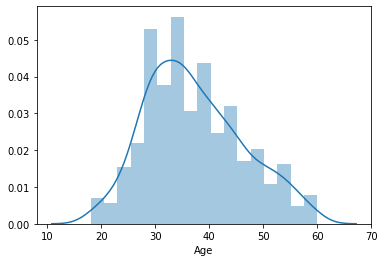

In [53]:
sns.distplot(df['Age'])

In [56]:
df["Age"].describe()

count    1000.000000
mean       37.199000
std         9.015802
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

In [10]:
df["Attrition"].value_counts()

No     984
Yes    192
Name: Attrition, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

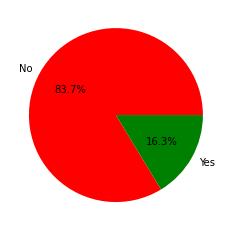

In [11]:
size=df["Attrition"].value_counts()
labels=["No","Yes"]
colors=["red","green"]
plt.pie(size,labels=labels,colors=colors,autopct = "%1.1f%%")
plt.show

In [57]:
df["Attrition"].describe()

count     1176
unique       2
top         No
freq       984
Name: Attrition, dtype: object

In [12]:
df["BusinessTravel"].value_counts()

Travel_Rarely        764
Travel_Frequently    192
Non-Travel           113
Name: BusinessTravel, dtype: int64

<BarContainer object of 3 artists>

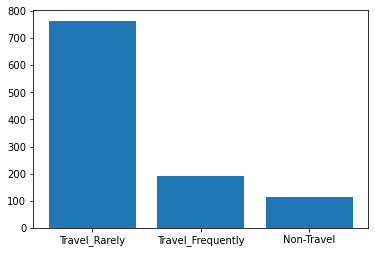

In [13]:
valori=df["BusinessTravel"].value_counts()
labels=["Travel_Rarely","Travel_Frequently","Non-Travel"]
plt.bar(labels,valori)

In [58]:
df["BusinessTravel"].describe()

count              1069
unique                3
top       Travel_Rarely
freq                764
Name: BusinessTravel, dtype: object

In [14]:
df["Department"].value_counts()

Research & Development    769
Sales                     361
Human Resources            46
Name: Department, dtype: int64

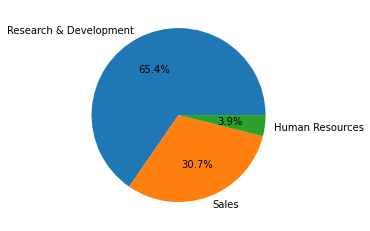

In [15]:
size=df["Department"].value_counts()
labels=["Research & Development","Sales","Human Resources"]
plt.pie(size,labels=labels,autopct="%1.1f%%")
plt.show()

In [59]:
df["Department"].describe()

count                       1176
unique                         3
top       Research & Development
freq                         769
Name: Department, dtype: object

In [16]:
s=pd.cut(df["DistanceFromHome"], bins=[0,5,10,15,20,25,30,35])
b=pd.DataFrame(s)
b

,DistanceFromHome
0,"(5, 10]"
1,"(0, 5]"
2,"(15, 20]"
3,"(0, 5]"
4,"(5, 10]"
...,...
1171,"(15, 20]"
1172,"(5, 10]"
1173,"(0, 5]"
1174,"(0, 5]"


In [17]:
b["DistanceFromHome"].value_counts(sort=False)

(0, 5]      506
(5, 10]     309
(10, 15]     97
(15, 20]    103
(20, 25]     94
(25, 30]     67
(30, 35]      0
Name: DistanceFromHome, dtype: int64

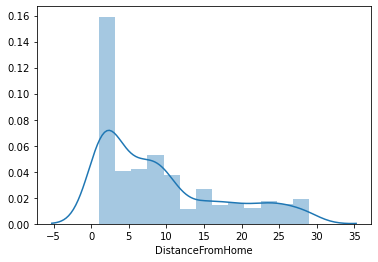

In [55]:
sns.distplot(df['DistanceFromHome'])

In [60]:
df["DistanceFromHome"].describe()

count    1176.000000
mean        9.210034
std         8.097024
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

In [18]:
df["EducationField"].value_counts()

Life Sciences       489
Medical             370
Marketing           125
Technical Degree    107
Other                64
Human Resources      21
Name: EducationField, dtype: int64

<BarContainer object of 6 artists>

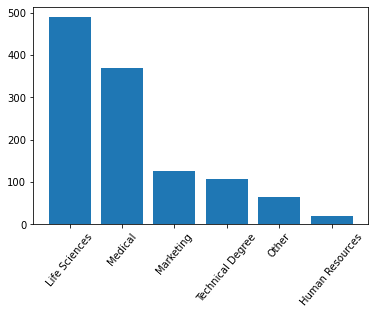

In [19]:
size=df["EducationField"].value_counts()
labels=["Life Sciences","Medical","Marketing","Technical Degree","Other","Human Resources"]
plt.xticks(rotation=50)
plt.bar(labels,size)

In [61]:
df["EducationField"].describe()

count              1176
unique                6
top       Life Sciences
freq                489
Name: EducationField, dtype: object

In [20]:
df["EnvironmentSatisfaction"].value_counts()                                        

3    366
4    351
2    233
1    226
Name: EnvironmentSatisfaction, dtype: int64

In [21]:
df["Gender"].value_counts()

Male      664
Female    453
Name: Gender, dtype: int64

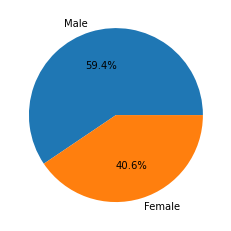

In [22]:
size=df["Gender"].value_counts()
labels=["Male","Female"]
plt.pie(size,labels=labels,autopct="%1.1f%%")
plt.show()

In [62]:
df["Gender"].describe()

count     1117
unique       2
top       Male
freq       664
Name: Gender, dtype: object

In [23]:
s=pd.cut(df["HourlyRate"], bins=[0,10,20,30,40,50,60,70,80,90,100])
d=pd.DataFrame(s)
d

,HourlyRate
0,"(80, 90]"
1,"(50, 60]"
2,"(30, 40]"
3,"(60, 70]"
4,"(70, 80]"
...,...
1171,"(90, 100]"
1172,"(70, 80]"
1173,"(80, 90]"
1174,"(90, 100]"


In [24]:
x=d["HourlyRate"].value_counts(sort=False)
f=pd.DataFrame(x)
f

,HourlyRate
"(0, 10]",0
"(10, 20]",0
"(20, 30]",13
"(30, 40]",139
"(40, 50]",160
"(50, 60]",177
"(60, 70]",156
"(70, 80]",182
"(80, 90]",173
"(90, 100]",176


In [25]:
df["JobInvolvement"].value_counts()

3    686
2    303
4    122
1     65
Name: JobInvolvement, dtype: int64

In [66]:
df["JobInvolvement"].describe()

count    1176.000000
mean        2.735544
std         0.716228
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: JobInvolvement, dtype: float64

In [26]:
df["JobLevel"].value_counts()

1    446
2    429
3    175
4     82
5     44
Name: JobLevel, dtype: int64

In [67]:
df["JobLevel"].describe()

count    1176.000000
mean        2.021259
std         1.069686
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: JobLevel, dtype: float64

In [27]:
df["JobRole"].value_counts()

Sales Executive              261
Research Scientist           240
Laboratory Technician        212
Manufacturing Director       115
Healthcare Representative    106
Manager                       81
Sales Representative          69
Research Director             51
Human Resources               41
Name: JobRole, dtype: int64

<BarContainer object of 9 artists>

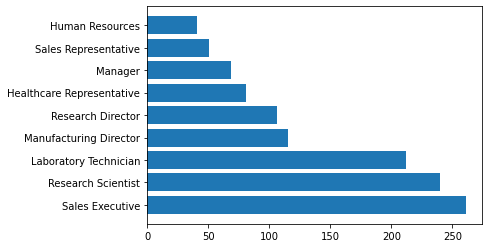

In [28]:
size=df["JobRole"].value_counts()
labels=["Sales Executive","Research Scientist","Laboratory Technician","Manufacturing Director","Research Director","Healthcare Representative","Manager","Sales Representative","Human Resources"]
plt.barh(labels,size)

In [68]:
df["JobRole"].describe()

count                1176
unique                  9
top       Sales Executive
freq                  261
Name: JobRole, dtype: object

In [29]:
df["JobSatisfaction"].value_counts(sort=False)

1    235
2    235
3    351
4    355
Name: JobSatisfaction, dtype: int64

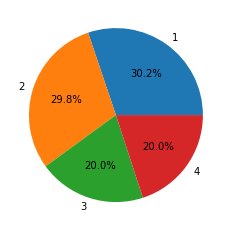

In [30]:
size=df["JobSatisfaction"].value_counts()
labels=["1","2","3","4"]
plt.pie(size,labels=labels,autopct="%1.1f%%")
plt.show()

In [69]:
df["JobSatisfaction"].describe()

count    1176.000000
mean        2.702381
std         1.101578
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

In [31]:
df["MaritalStatus"].value_counts()

Married     542
Single      383
Divorced    251
Name: MaritalStatus, dtype: int64

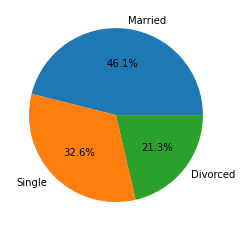

In [33]:
size=df["MaritalStatus"].value_counts()
labels=["Married","Single","Divorced"]
plt.pie(size,labels=labels,autopct="%1.1f%%")
plt.show()

In [70]:
df["MaritalStatus"].describe()

count        1176
unique          3
top       Married
freq          542
Name: MaritalStatus, dtype: object

In [34]:
s=pd.cut(df["MonthlyRate"], bins=[0,5000,10000,15000,20000,25000,30000])
d=pd.DataFrame(s)
d

,MonthlyRate
0,"(10000, 15000]"
1,"(5000, 10000]"
2,"(15000, 20000]"
3,"(15000, 20000]"
4,"(5000, 10000]"
...,...
1171,"(5000, 10000]"
1172,"(20000, 25000]"
1173,"(15000, 20000]"
1174,"(20000, 25000]"


In [35]:
d["MonthlyRate"].value_counts()

(20000, 25000]    245
(5000, 10000]     245
(15000, 20000]    244
(10000, 15000]    227
(0, 5000]         138
(25000, 30000]     77
Name: MonthlyRate, dtype: int64

<BarContainer object of 6 artists>

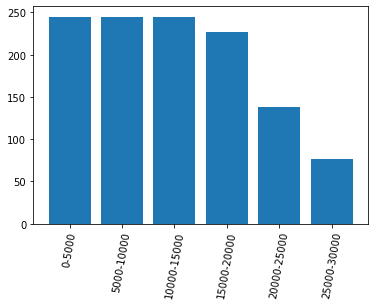

In [36]:
size=d["MonthlyRate"].value_counts()
labels=["0-5000","5000-10000","10000-15000","15000-20000","20000-25000","25000-30000"]
plt.xticks(rotation=80)
plt.bar(labels,size)

In [71]:
df["MonthlyRate"].describe()

count     1176.000000
mean     14395.836735
std       7111.845106
min       2097.000000
25%       8227.250000
50%      14434.000000
75%      20489.250000
max      26999.000000
Name: MonthlyRate, dtype: float64

In [37]:
t=pd.cut(df["MonthlyIncome"], bins=[0,5000,10000,15000,20000])
f=pd.DataFrame(t)
f

,MonthlyIncome
0,"(5000, 10000]"
1,"(0, 5000]"
2,"(0, 5000]"
3,"(0, 5000]"
4,"(5000, 10000]"
...,...
1171,"(0, 5000]"
1172,"(5000, 10000]"
1173,"(0, 5000]"
1174,"(0, 5000]"


In [38]:
f["MonthlyIncome"].value_counts()

(0, 5000]         485
(5000, 10000]     284
(10000, 15000]    107
(15000, 20000]     87
Name: MonthlyIncome, dtype: int64

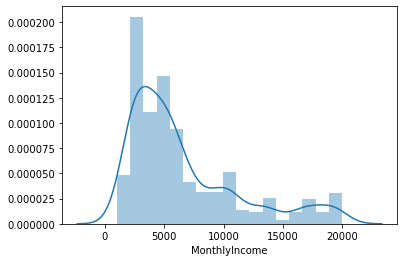

In [54]:
sns.distplot(df['MonthlyIncome'])

In [72]:
df["MonthlyIncome"].describe()

count      963.000000
mean      6565.946002
std       4710.625603
min       1009.000000
25%       2969.000000
50%       4969.000000
75%       8585.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [41]:
df["NumCompaniesWorked"].value_counts()

1    433
0    153
3    123
2    119
4    103
7     60
6     55
5     50
9     40
8     40
Name: NumCompaniesWorked, dtype: int64

In [42]:
tab=pd.crosstab(index=df["NumCompaniesWorked"],columns="Frequency") 
(tab/tab.sum())*100

col_0,Frequency
NumCompaniesWorked,
0,13.010204
1,36.819728
2,10.119048
3,10.459184
4,8.758503
5,4.251701
6,4.676871
7,5.102041
8,3.401361


In [73]:
df["NumCompaniesWorked"].describe()

count    1176.000000
mean        2.663265
std         2.491287
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64

In [43]:
df["OverTime"].value_counts()

No     838
Yes    338
Name: OverTime, dtype: int64

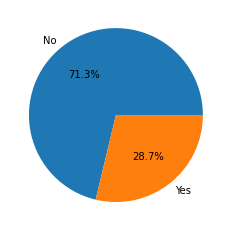

In [44]:
size=df["OverTime"].value_counts()
labels=["No","Yes"]
plt.pie(size,labels=labels,autopct="%1.1f%%")
plt.show()

In [45]:
df["PercentSalaryHike"].value_counts()

12    167
11    165
13    162
14    160
15     79
18     75
16     71
17     62
19     61
20     44
22     42
21     37
23     20
24     17
25     14
Name: PercentSalaryHike, dtype: int64

In [74]:
df["PercentSalaryHike"].describe()

count    1176.000000
mean       15.176871
std         3.623941
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

In [46]:
df["StockOptionLevel"].value_counts(sort=False)

0    514
1    470
2    125
3     67
Name: StockOptionLevel, dtype: int64

In [75]:
df["StockOptionLevel"].describe()

count    1176.000000
mean        0.783163
std         0.851385
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: StockOptionLevel, dtype: float64

In [47]:
s=pd.cut(df["TotalWorkingYears"],bins=[1,5,10,15,20,25,30,35,40])
f=pd.DataFrame(s)
f

,TotalWorkingYears
0,"(15.0, 20.0]"
1,"(20.0, 25.0]"
2,"(5.0, 10.0]"
3,"(10.0, 15.0]"
4,"(1.0, 5.0]"
...,...
1171,NaN
1172,"(10.0, 15.0]"
1173,"(1.0, 5.0]"
1174,"(10.0, 15.0]"


In [48]:
x=f["TotalWorkingYears"].value_counts(sort=False)
d=pd.DataFrame(x)
d

,TotalWorkingYears
"(1, 5]",180
"(5, 10]",482
"(10, 15]",160
"(15, 20]",114
"(20, 25]",82
"(25, 30]",35
"(30, 35]",26
"(35, 40]",11


In [76]:
df["TotalWorkingYears"].describe()

count    1176.000000
mean       11.019558
std         7.694848
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64

In [49]:
tab=pd.crosstab(index=df["TrainingTimesLastYear"],columns="Frequency") 
(tab/tab.sum())*100

col_0,Frequency
TrainingTimesLastYear,
0.0,3.393425
1.0,4.665960
2.0,35.949099
3.0,34.570520
4.0,8.695652
5.0,8.695652
6.0,4.029692


In [77]:
df["TrainingTimesLastYear"].describe()

count    943.000000
mean       2.827147
std        1.273120
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        6.000000
Name: TrainingTimesLastYear, dtype: float64

In [78]:
df["WorkLifeBalance"].value_counts()

3    718
2    272
4    119
1     67
Name: WorkLifeBalance, dtype: int64

In [79]:
df["WorkLifeBalance"].describe()

count    1176.000000
mean        2.755952
std         0.707984
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: WorkLifeBalance, dtype: float64

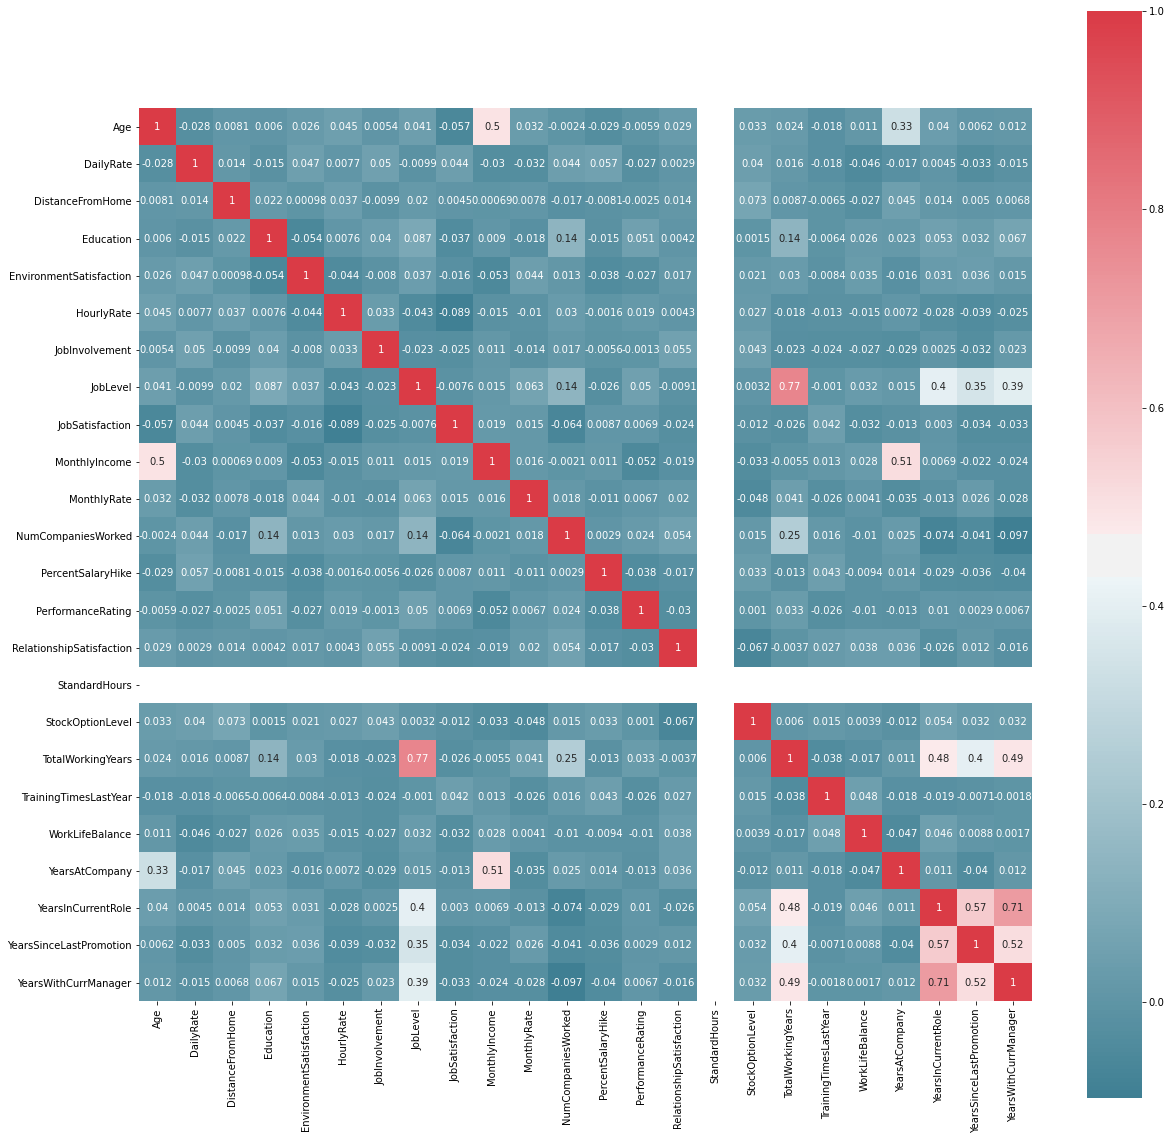

In [51]:
f, ax = plt.subplots(figsize=(20, 20))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)

In [52]:
df.skew(axis=0)

Age                         0.400609
DailyRate                  -0.010634
DistanceFromHome            0.941174
Education                  -0.288001
EnvironmentSatisfaction    -0.314352
HourlyRate                 -0.054512
JobInvolvement             -0.466486
JobLevel                    1.035892
JobSatisfaction            -0.290774
MonthlyIncome               1.335179
MonthlyRate                -0.013753
NumCompaniesWorked          1.056722
PercentSalaryHike           0.829487
PerformanceRating           1.939080
RelationshipSatisfaction   -0.284815
StandardHours               0.000000
StockOptionLevel            0.984993
TotalWorkingYears           1.157434
TrainingTimesLastYear       0.518437
WorkLifeBalance            -0.578251
YearsAtCompany              1.816226
YearsInCurrentRole          0.916223
YearsSinceLastPromotion     1.954910
YearsWithCurrManager        0.855805
dtype: float64

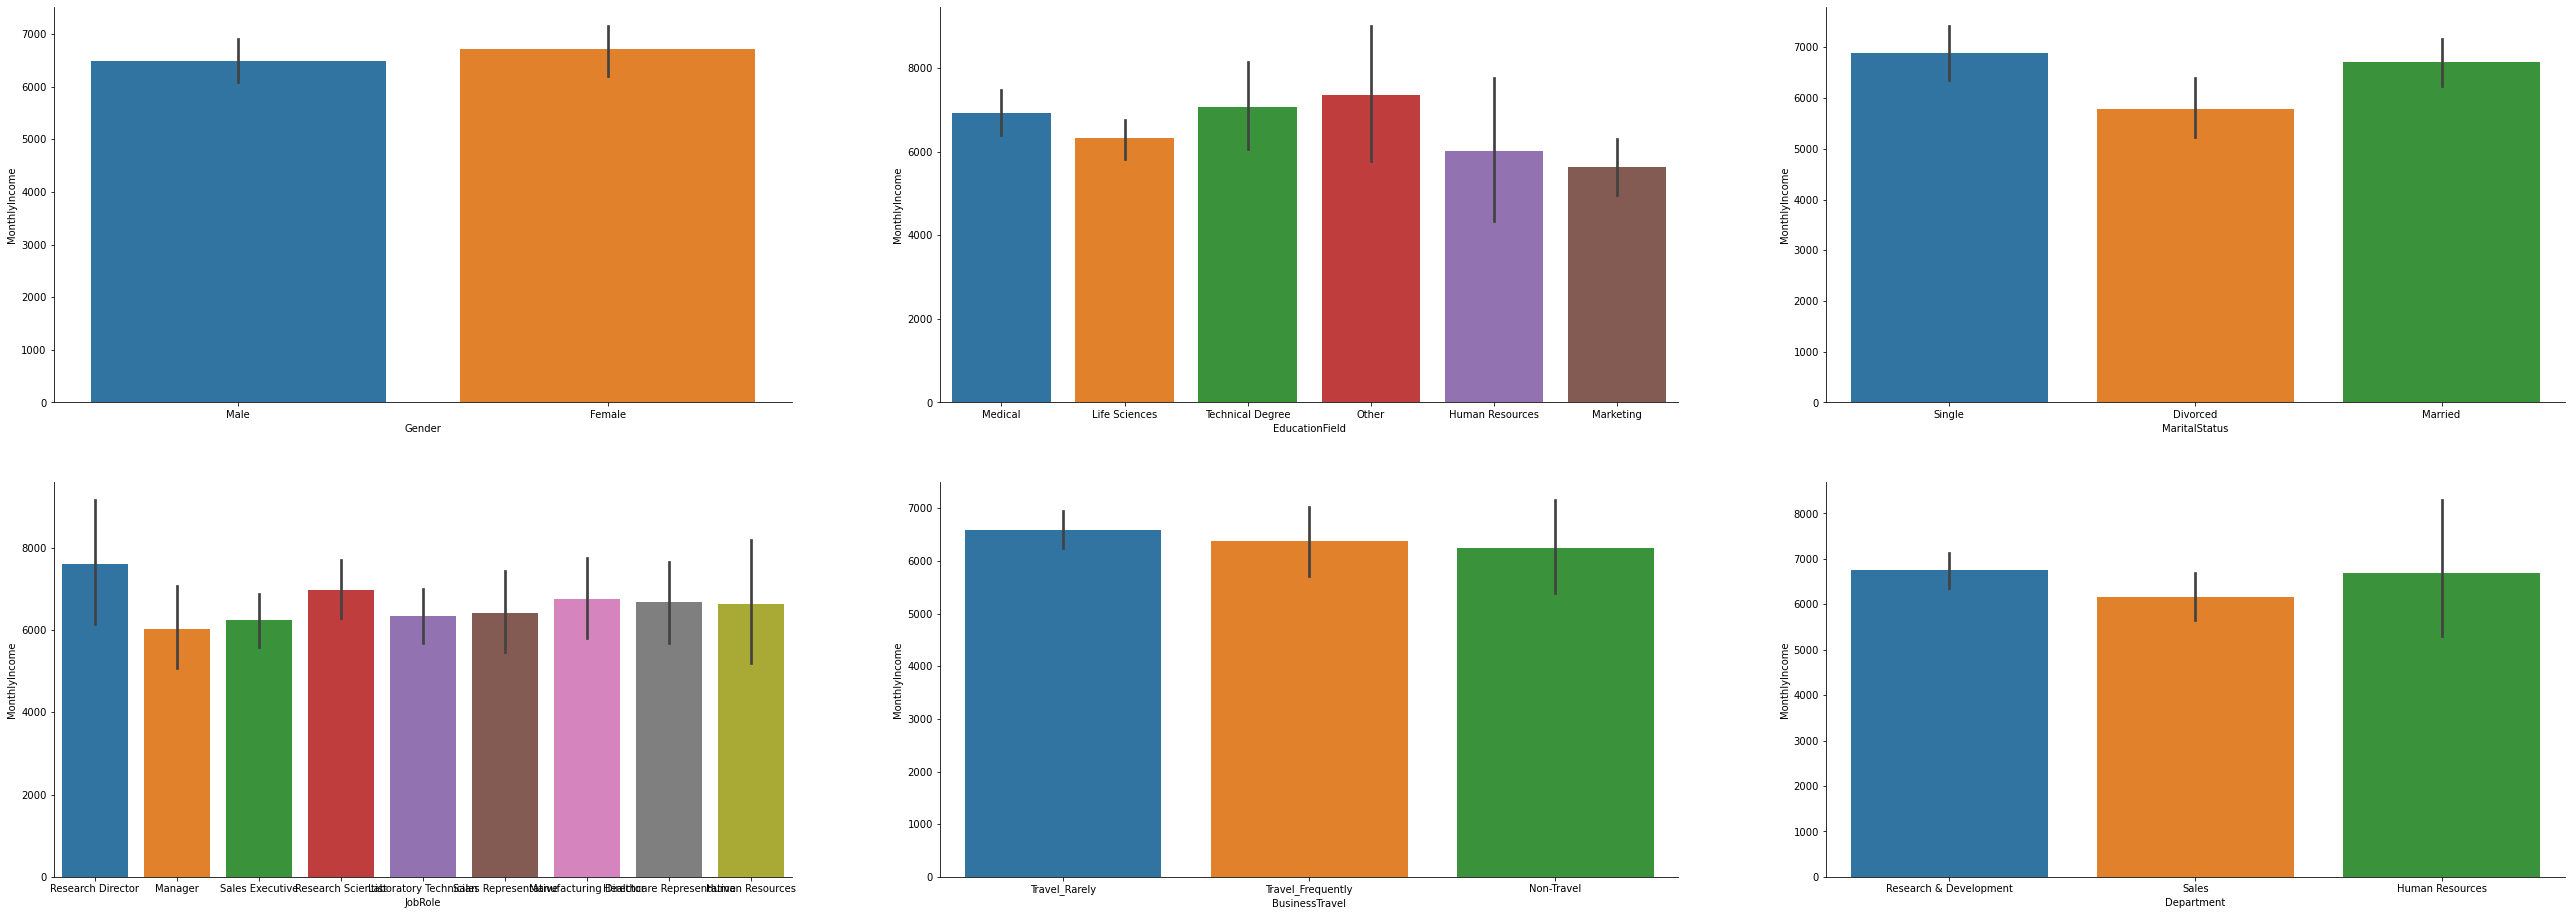

In [58]:
fig,axes = plt.subplots(2,3, figsize=(45,16))
sns.despine(left=False)
sns.barplot(ax=axes[0,0], data=df, x="Gender", y="MonthlyIncome")
sns.barplot(ax=axes[0,1], data=df, x="EducationField", y="MonthlyIncome")
sns.barplot(ax=axes[0,2], data=df, x="MaritalStatus", y="MonthlyIncome")
sns.barplot(ax=axes[1,0], data=df, x="JobRole", y="MonthlyIncome")
sns.barplot(ax=axes[1,1], data=df, x="BusinessTravel", y="MonthlyIncome")
sns.barplot(ax=axes[1,2], data=df, x="Department", y="MonthlyIncome")

In [103]:
df.groupby("Gender")["MonthlyIncome"].mean()

Gender
Female    6709.543011
Male      6487.651934
Name: MonthlyIncome, dtype: float64

In [104]:
df.groupby("EducationField")["MonthlyIncome"].mean()

EducationField
Human Resources     6013.631579
Life Sciences       6336.340000
Marketing           5624.850000
Medical             6932.423841
Other               7360.354167
Technical Degree    7072.734043
Name: MonthlyIncome, dtype: float64

In [105]:
df.groupby("MaritalStatus")["MonthlyIncome"].mean()

MaritalStatus
Divorced    5777.399038
Married     6710.849438
Single      6887.029032
Name: MonthlyIncome, dtype: float64

In [106]:
df.groupby("JobRole")["MonthlyIncome"].mean()

JobRole
Healthcare Representative    6668.329787
Human Resources              6628.028571
Laboratory Technician        6335.127273
Manager                      6013.478873
Manufacturing Director       6747.900000
Research Director            7611.772727
Research Scientist           6975.304124
Sales Executive              6247.047170
Sales Representative         6416.155172
Name: MonthlyIncome, dtype: float64

In [107]:
df.groupby("BusinessTravel")["MonthlyIncome"].mean()

BusinessTravel
Non-Travel           6237.806122
Travel_Frequently    6371.369697
Travel_Rarely        6583.507293
Name: MonthlyIncome, dtype: float64

In [108]:
df.groupby("Department")["MonthlyIncome"].mean()

Department
Human Resources           6679.400000
Research & Development    6752.452077
Sales                     6157.558923
Name: MonthlyIncome, dtype: float64

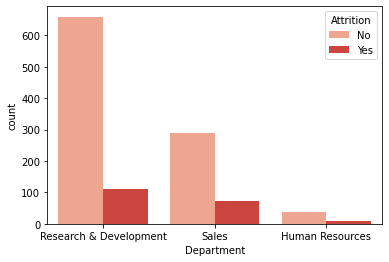

In [82]:
sns.countplot(x='Department',hue='Attrition',data=df,palette="Reds")

In [98]:
df.groupby("Department")["Attrition"].value_counts()

Department              Attrition
Human Resources         No            36
                        Yes           10
Research & Development  No           659
                        Yes          110
Sales                   No           289
                        Yes           72
Name: Attrition, dtype: int64

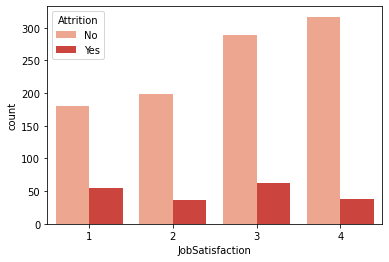

In [83]:
sns.countplot(x='JobSatisfaction',hue='Attrition',data=df,palette="Reds")

In [99]:
df.groupby("JobSatisfaction")["Attrition"].value_counts()

JobSatisfaction  Attrition
1                No           180
                 Yes           55
2                No           198
                 Yes           37
3                No           289
                 Yes           62
4                No           317
                 Yes           38
Name: Attrition, dtype: int64

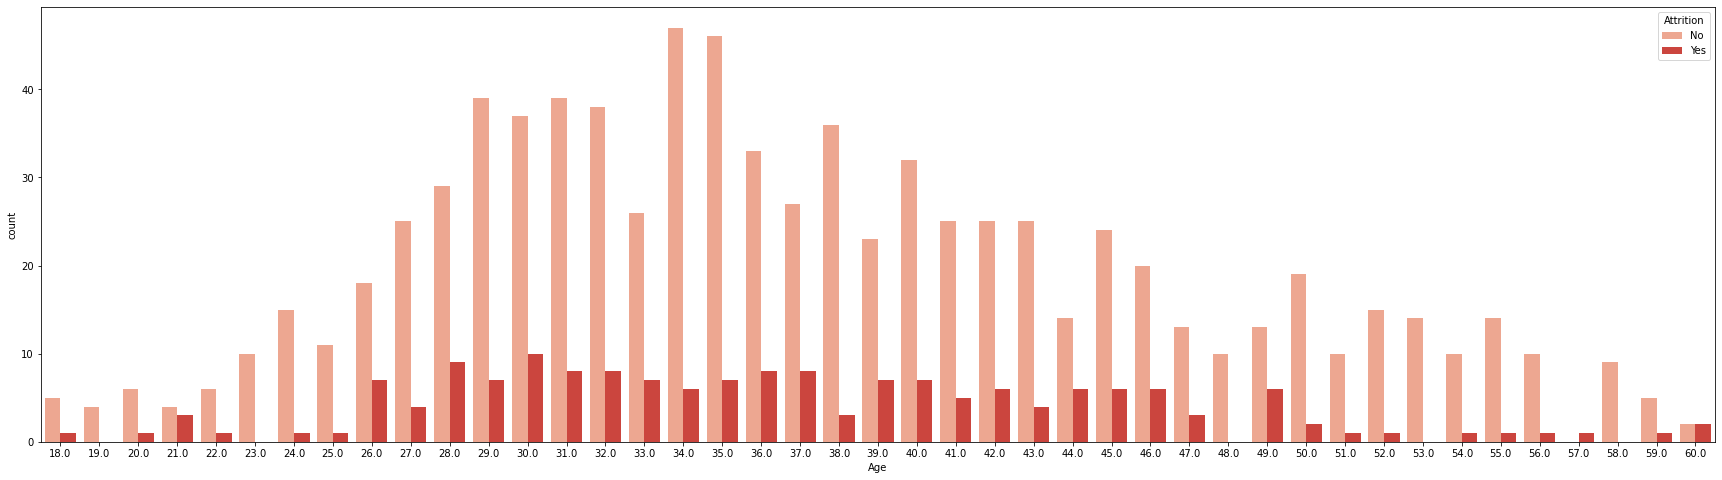

In [95]:
plt.figure(figsize=(30,8))
sns.countplot(x='Age',hue='Attrition',data=df,palette="Reds")

In [100]:
df.groupby("Age")["Attrition"].value_counts()

Age   Attrition
18.0  No           5
      Yes          1
19.0  No           4
20.0  No           6
      Yes          1
                  ..
58.0  No           9
59.0  No           5
      Yes          1
60.0  No           2
      Yes          2
Name: Attrition, Length: 80, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

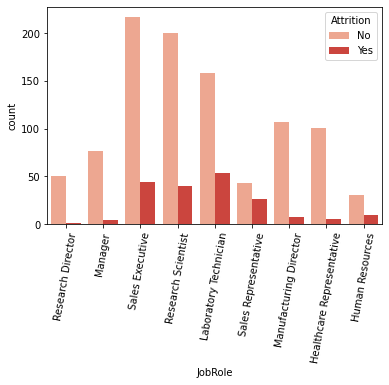

In [97]:
sns.countplot(x='JobRole',hue='Attrition',data=df,palette="Reds")
plt.xticks(rotation=80)

In [101]:
df.groupby("JobRole")["Attrition"].value_counts()

JobRole                    Attrition
Healthcare Representative  No           101
                           Yes            5
Human Resources            No            31
                           Yes           10
Laboratory Technician      No           158
                           Yes           54
Manager                    No            77
                           Yes            4
Manufacturing Director     No           107
                           Yes            8
Research Director          No            50
                           Yes            1
Research Scientist         No           200
                           Yes           40
Sales Executive            No           217
                           Yes           44
Sales Representative       No            43
                           Yes           26
Name: Attrition, dtype: int64